In [2]:
import numpy as np
import scipy.sparse as sparse
import math
import matplotlib.pyplot as plt
from mec import make_circle
import copy
from itertools import chain
from collections import Counter

In [3]:
def in_circle(point, circle):
    x, y = point
    cx, cy, r = circle
    return np.sqrt((x - cx)**2 + (y - cy)**2) <= r

def independent_gens(gens):
    ind_sets = []
    gen_sets = [set(gen) for gen in gens]

    while gen_sets:
        ind_set = [gen_sets[0]]
        gen_sets.pop(0)

        for i, gen_set in reversed(list(enumerate(gen_sets))):
            add = True
            for gen in ind_set:
                if (gen & gen_set):
                    add = False

            if add:
                ind_set.append(gen_set)
                gen_sets.pop(i)

        if (ind_set):
            ind_sets.append(ind_set)

    return ind_sets


In [12]:
m = 20
n = m**2

r = np.sqrt(2)*((m/2)**1)
deg_v = 5 # w_c. Every bit is in this many checks
deg_c = 5 # w_r. Every check has this many bits in it
num_checks = (n*deg_v)//deg_c
k = n - num_checks

vs = [deg_v for _ in range(n)]
qbts = [(x,y) for x in range(m) for y in range(m)]
pot_qbts = np.ones((num_checks, n))
ops = [[] for i in range(num_checks)]

while (np.count_nonzero(vs)):
    if (np.count_nonzero(pot_qbts)):
        c_ind = np.random.choice(np.where(pot_qbts.any(axis=1))[0])
    else:
        # print("Failed")
        break

    # choose a v that is within the specified radius (from list of potential qbts)
    v_ind = np.random.choice(np.nonzero(pot_qbts[c_ind])[0])
    ops[c_ind].append(qbts[v_ind])
    
    if (len(ops[c_ind]) == deg_c):
        pot_qbts[c_ind, :] = 0
    else:
        pot_qbts[c_ind][v_ind] = 0

    # update potential qbts
    for pot_ind, pot in enumerate(pot_qbts[c_ind]):
        if (pot and (make_circle(ops[c_ind] + [qbts[pot_ind]])[2] > r)):
            pot_qbts[c_ind][pot_ind] = 0

    vs[v_ind] -= 1
    if (not vs[v_ind]):
        pot_qbts[:, v_ind] = 0

    print(sum(vs))

1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1969
1968
1967
1966
1965
1964
1963
1962
1961
1960
1959
1958
1957
1956
1955
1954
1953
1952
1951
1950
1949
1948
1947
1946
1945
1944
1943
1942
1941
1940
1939
1938
1937
1936
1935
1934
1933
1932
1931
1930
1929
1928
1927
1926
1925
1924
1923
1922
1921
1920
1919
1918
1917
1916
1915
1914
1913
1912
1911
1910
1909
1908
1907
1906
1905
1904
1903
1902
1901
1900
1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801
1800


11


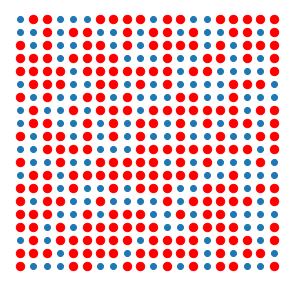

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))


ind_sets = independent_gens(ops)
print(len(ind_sets))

all_points = [(x,y) for x in range(m) for y in range(m)]
xs, ys = zip(*all_points)
ax.scatter(xs, ys)


i = 2
ind_set = [list(s) for s in ind_sets[i]]
gen_xs, gen_ys = zip(*list(chain(*ind_set)))
ax.scatter(gen_xs, gen_ys, c='r', s=70)

ax.axis('off')
plt.show()

In [92]:
_ = []
for gen in ops:
    for qbt in gen:
        _.append(qbt)

qbt_counter = Counter(_ + qbts)
print(qbt_counter)

Counter({(4, 0): 5, (7, 0): 5, (5, 0): 5, (9, 0): 5, (9, 1): 5, (5, 7): 5, (8, 4): 5, (5, 6): 5, (8, 7): 5, (6, 7): 5, (8, 8): 5, (8, 5): 5, (9, 7): 5, (8, 6): 5, (6, 2): 5, (7, 5): 5, (5, 2): 5, (9, 4): 5, (6, 0): 5, (2, 2): 5, (1, 0): 5, (3, 2): 5, (4, 1): 5, (1, 5): 5, (0, 3): 5, (2, 0): 5, (3, 1): 5, (7, 3): 5, (6, 6): 5, (5, 3): 5, (7, 2): 5, (5, 5): 5, (4, 5): 5, (6, 3): 5, (7, 1): 5, (3, 5): 5, (2, 4): 5, (1, 6): 5, (1, 9): 5, (1, 8): 5, (7, 6): 5, (4, 9): 5, (1, 3): 5, (0, 1): 5, (0, 5): 5, (0, 6): 5, (2, 8): 5, (3, 9): 5, (0, 9): 5, (1, 4): 5, (3, 8): 5, (2, 3): 5, (4, 2): 5, (2, 6): 5, (2, 7): 5, (6, 8): 5, (9, 5): 5, (3, 7): 5, (4, 7): 5, (1, 1): 5, (0, 2): 5, (5, 1): 5, (4, 4): 5, (2, 1): 5, (8, 2): 5, (6, 1): 5, (4, 6): 5, (5, 8): 5, (5, 9): 5, (4, 8): 5, (3, 3): 5, (2, 5): 5, (0, 8): 5, (0, 7): 5, (8, 0): 5, (9, 2): 5, (3, 0): 5, (9, 6): 5, (6, 9): 5, (5, 4): 5, (6, 5): 5, (7, 4): 5, (4, 3): 5, (8, 1): 5, (8, 3): 5, (7, 7): 5, (3, 4): 5, (6, 4): 5, (9, 3): 5, (1, 7): 5, (

In [86]:
print(len([op for op in ops if len(op) == deg_c]))
print(num_checks)

373
400


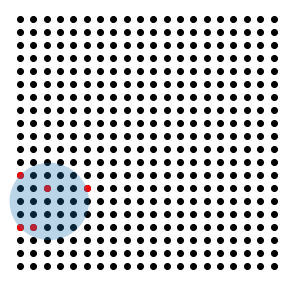

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

i = 0

# pot_qbt_inds = [qbts[j] for j in pot_qbts[i]]
xs, ys = zip(*qbts)
op_xs, op_ys = zip(*ops[i])
# pot_xs, pot_ys = zip(*pot_qbt_inds)

cir = make_circle(ops[i])
c = plt.Circle((cir[0], cir[1]), cir[2], alpha=0.3)
ax.scatter(xs, ys, c='k')
ax.scatter(op_xs, op_ys, c='r')
# ax.scatter(pot_xs, pot_ys, c='b')


ax.add_artist(c)
ax.axis('off')
plt.show()

In [83]:
print(ops[0])

[(2, 6), (5, 6), (1, 3), (0, 7), (0, 3)]


In [63]:
for i in np.linspace(0, 1, 11):
    print(i, np.sqrt(2)*(m/2)**i)

0.0 1.4142135623730951
0.1 1.7803893913754452
0.2 2.241377447691299
0.30000000000000004 2.821727026320928
0.4 3.552343858581805
0.5 4.47213595499958
0.6000000000000001 5.630085598747348
0.7000000000000001 7.087857830839416
0.8 8.923084338428025
0.9 11.233497625229584
1.0 14.142135623730951


In [64]:
rs = [make_circle(op)[2] for op in ops]
print(np.mean(rs))

4.000960963324753


In [77]:
arr = [1,2,3,4,5]
i = 3

print(arr[: i+1])

[1, 2, 3, 4]


In [81]:
points = [(1,2)]
make_circle(points)

(1.0, 2.0, 0.0)